# **Importing Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Data Selection**

In [2]:
data = pd.read_excel("iconnet-revenue.xlsx")
data.head()

,nama,tanggal,namakp,mitraagen,ae,namaproduk,harga,lamaberlangganan,totalharga
0,I PUTU MERTA,2023-01-29,BALI,PT PLN ICON PLUS,BENY,ICONNET - 20 MBPS,212000,10,2120000
1,ARIEF HIDAYAT,2023-01-31,NUSA TENGGARA BARAT,PT PLN ICON PLUS,VERA,ICONNET - 10 MBPS,196000,3,588000
2,HERMANTO,2023-01-29,NUSA TENGGARA BARAT,PT PLN ICON PLUS,VERA,ICONNET - 10 MBPS,196000,3,588000
3,SRINITA,2023-04-01,NUSA TENGGARA BARAT,PT PLN ICON PLUS,VERA,ICONNET - 10 MBPS,196000,3,588000
4,SYAMSIR,2023-11-01,NUSA TENGGARA BARAT,PT PLN ICON PLUS,VERA,ICONNET - 10 MBPS,196000,3,588000


# **Data Understanding**

In [3]:
# Check data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15063 entries, 0 to 15062
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   nama              15063 non-null  object        
 1   tanggal           15063 non-null  datetime64[ns]
 2   namakp            15063 non-null  object        
 3   mitraagen         15063 non-null  object        
 4   ae                15063 non-null  object        
 5   namaproduk        15063 non-null  object        
 6   harga             15063 non-null  int64         
 7   lamaberlangganan  15063 non-null  int64         
 8   totalharga        15063 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 1.0+ MB


In [4]:
# Display basic statistics
data.describe(include='all')

,nama,tanggal,namakp,mitraagen,ae,namaproduk,harga,lamaberlangganan,totalharga
count,15063,15063,15063,15063,15063,15063,15063.000000,15063.000000,1.506300e+04
unique,14374,NaN,3,7,16,5,NaN,NaN,NaN
top,I WAYAN SUDIARTA,NaN,BALI,MITRA INDIVIDU PENJUALAN,SONI,ICONNET - 10 MBPS,NaN,NaN,NaN
freq,15,NaN,8460,7440,2477,6910,NaN,NaN,NaN
mean,NaN,2023-06-26 15:34:05.568611840,NaN,NaN,NaN,NaN,218936.267676,4.882228,1.055755e+06
min,NaN,2023-01-01 00:00:00,NaN,NaN,NaN,NaN,188000.000000,1.000000,1.880000e+05
25%,NaN,2023-04-18 00:00:00,NaN,NaN,NaN,NaN,196000.000000,3.000000,5.880000e+05
50%,NaN,2023-07-10 00:00:00,NaN,NaN,NaN,NaN,212000.000000,4.000000,8.480000e+05
75%,NaN,2023-09-01 12:00:00,NaN,NaN,NaN,NaN,212000.000000,7.000000,1.380000e+06
max,NaN,2023-12-10 00:00:00,NaN,NaN,NaN,NaN,679000.000000,15.000000,6.790000e+06


In [5]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

nama                0
tanggal             0
namakp              0
mitraagen           0
ae                  0
namaproduk          0
harga               0
lamaberlangganan    0
totalharga          0
dtype: int64

In [6]:
# Check for duplicates
duplicates = data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.shape

(15058, 9)

In [7]:
# Cleaning data
data.drop(columns=['nama'], inplace=True)
data

,tanggal,namakp,mitraagen,ae,namaproduk,harga,lamaberlangganan,totalharga
0,2023-01-29,BALI,PT PLN ICON PLUS,BENY,ICONNET - 20 MBPS,212000,10,2120000
1,2023-01-31,NUSA TENGGARA BARAT,PT PLN ICON PLUS,VERA,ICONNET - 10 MBPS,196000,3,588000
2,2023-01-29,NUSA TENGGARA BARAT,PT PLN ICON PLUS,VERA,ICONNET - 10 MBPS,196000,3,588000
3,2023-04-01,NUSA TENGGARA BARAT,PT PLN ICON PLUS,VERA,ICONNET - 10 MBPS,196000,3,588000
4,2023-11-01,NUSA TENGGARA BARAT,PT PLN ICON PLUS,VERA,ICONNET - 10 MBPS,196000,3,588000
...,...,...,...,...,...,...,...,...
15058,2023-09-30,BALI,MITRA INDIVIDU PENJUALAN,MITA,ICONNET - 35 MBPS,230000,15,3450000
15059,2023-09-30,BALI,MITRA INDIVIDU PENJUALAN,MITA,ICONNET - 35 MBPS,230000,15,3450000
15060,2023-09-30,BALI,PT PLN ICON PLUS,SONI,ICONNET - 35 MBPS,230000,15,3450000
15061,2023-09-30,BALI,MITRA INDIVIDU PENJUALAN,G. INDRA,ICONNET - 10 MBPS,188000,15,2820000


# **Data Transformation**

In [8]:
# Encoding categorical data using LabelEncoder
le = LabelEncoder()
categorical_columns = ['namakp', 'namaproduk', 'mitraagen', 'ae']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Convert date column to datetime type
data['tanggal'] = pd.to_datetime(data['tanggal'])

# Create new column for month and year from the date
data['month'] = data['tanggal'].dt.month
data['year'] = data['tanggal'].dt.year

# Drop the original date column
data.drop('tanggal', axis=1, inplace=True)

print(data.head(10))

   namakp  mitraagen  ae  namaproduk   harga  lamaberlangganan  totalharga  \
0       0          3   1           2  212000                10     2120000   
1       1          3  15           0  196000                 3      588000   
2       1          3  15           0  196000                 3      588000   
3       1          3  15           0  196000                 3      588000   
4       1          3  15           0  196000                 3      588000   
5       1          3  15           0  196000                 3      588000   
6       1          3  15           4  414000                 3     1242000   
7       1          3  15           0  196000                 3      588000   
8       1          3  15           0  196000                 3      588000   
9       1          3  15           0  196000                 3      588000   

   month  year  
0      1  2023  
1      1  2023  
2      1  2023  
3      4  2023  
4     11  2023  
5      1  2023  
6      1  2023  
7    

In [9]:
# Scale the data
scaler = MinMaxScaler()
numeric_columns = ['harga', 'totalharga']
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

**Feature Selection**

In [10]:
# Separate features and target
X = data.drop('totalharga', axis=1)
y = data['totalharga']

# Train a decision tree regressor
model = DecisionTreeRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a dataframe with feature names and importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort features by importance in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the top 5 most important features
print(feature_importances.head(5))


            feature  importance
5  lamaberlangganan    0.868478
4             harga    0.114412
3        namaproduk    0.015954
0            namakp    0.000935
6             month    0.000220


In [11]:
# Calculate the correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix['totalharga'].sort_values(ascending=False))

totalharga          1.000000
lamaberlangganan    0.931440
harga               0.224676
mitraagen           0.156505
namaproduk          0.071997
namakp             -0.013822
ae                 -0.028895
month              -0.197566
year                     NaN
Name: totalharga, dtype: float64


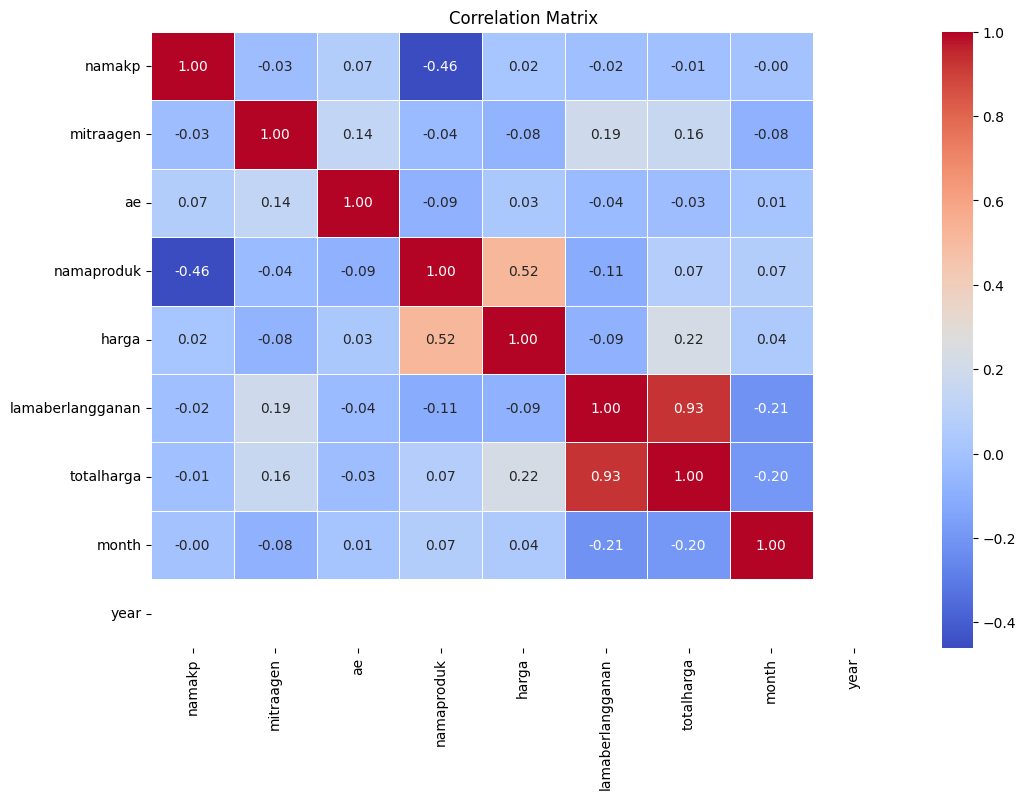

In [12]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

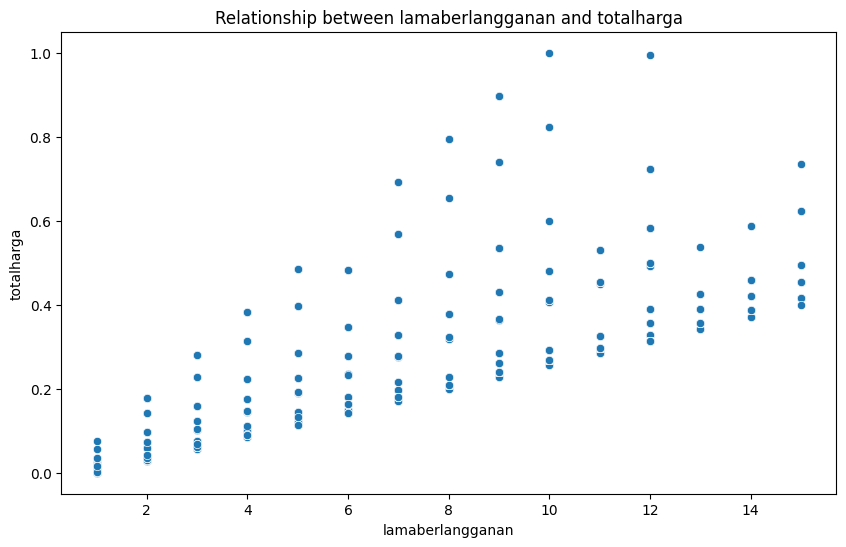

In [13]:
# prompt: buatkan visualisasi untuk Relationship between lamaberlangganan and totalharga

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='lamaberlangganan', y='totalharga')
plt.title('Relationship between lamaberlangganan and totalharga')
plt.xlabel('lamaberlangganan')
plt.ylabel('totalharga')
plt.show()


# **Data Mining (Building Model DT)**

In [14]:
# Data splitting
X = data.drop(columns=['totalharga'])
y = data['totalharga']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Model prediction
y_pred = model.predict(X_test)

In [15]:
print("Jumlah baris data latih (X_train, y_train):", X_train.shape[0])
print("Jumlah baris data uji (X_test, y_test):", X_test.shape[0])

Jumlah baris data latih (X_train, y_train): 12046
Jumlah baris data uji (X_test, y_test): 3012


In [16]:
print(X_test.head(10))
print(y_test.head(10))

       namakp  mitraagen  ae  namaproduk     harga  lamaberlangganan  month  \
11977       0          2   5           2  0.048880                 3      6   
1056        2          2  10           0  0.016293                 9      1   
5987        1          2  15           0  0.016293                 5      6   
3643        0          3  12           2  0.048880                 6      8   
14710       0          3  11           4  0.301426                 2      6   
4861        1          3  15           0  0.016293                12      6   
11414       0          2   5           2  0.048880                 9      8   
11057       0          2   5           2  0.048880                 3      8   
8697        1          2  15           3  0.207739                 5      3   
3445        0          2   5           2  0.048880                 6      4   

       year  
11977  2023  
1056   2023  
5987   2023  
3643   2023  
14710  2023  
4861   2023  
11414  2023  
11057  2023  
8697

**Evaluation**

In [17]:
# Evaluation Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
evaluation_metrics = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2
}

print("Evaluation Metrics:")
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value}")

Evaluation Metrics:
MAE: 4.360021290214938e-05
MSE: 3.7810519270942717e-06
RMSE: 0.0019444927171615408
R2: 0.9996146286866541


# **Predicting Revenue**

**Input Data Revenue 2022 and 2023 for Prediction**

In [18]:
# Data total pendapatan di 2022
data_2022 = {
    'Provinsi': ['BALI', 'NUSA TENGGARA BARAT', 'NUSA TENGGARA TIMUR'],
    '2022': [3220853684, 1277415042, 604448722]
}

# Data total pendapatan di 2023
data_2023 = {
    'Provinsi': ['BALI', 'NUSA TENGGARA BARAT', 'NUSA TENGGARA TIMUR'],
    '2023': [9086408000, 3143802000, 3672627000]
}

**Predict Revenue Yearly**

In [19]:
# Convert dictionary to DataFrame
df_2022 = pd.DataFrame(data_2022)
df_2023 = pd.DataFrame(data_2023)

# Merge DataFrames on Provinsi
df = pd.merge(df_2022, df_2023, on='Provinsi')
df.set_index('Provinsi', inplace=True)

# Define features and targets
X = df[['2022', '2023']].values

# Generate targets for 2024, 2025, and 2026 with assumed growth rates
np.random.seed(42)
y_2024 = (df['2023'] * np.random.uniform(1.05, 1.15, df.shape[0])).astype(int)
y_2025 = (y_2024 * np.random.uniform(1.05, 1.15, df.shape[0])).astype(int)
y_2026 = (y_2025 * np.random.uniform(1.05, 1.15, df.shape[0])).astype(int)

# Train decision tree models
model_2024 = DecisionTreeRegressor(random_state=42)
model_2024.fit(X, y_2024)

model_2025 = DecisionTreeRegressor(random_state=42)
model_2025.fit(X, y_2025)

model_2026 = DecisionTreeRegressor(random_state=42)
model_2026.fit(X, y_2026)

DecisionTreeRegressor(random_state=42)

In [20]:
# Predict future revenues
df['pred_2024'] = model_2024.predict(X).astype(int)
df['pred_2025'] = model_2025.predict(X).astype(int)
df['pred_2026'] = model_2026.predict(X).astype(int)

# Format results for display
def format_number(x):
    return f'{int(x):,}'

df_formatted = df.applymap(lambda x: format_number(x))

# Display the formatted table
print(df_formatted)

                              2022           2023      pred_2024  \
Provinsi                                                           
BALI                 3,220,853,684  9,086,408,000  9,881,050,833   
NUSA TENGGARA BARAT  1,277,415,042  3,143,802,000  3,599,877,853   
NUSA TENGGARA TIMUR    604,448,722  3,672,627,000  4,125,092,421   

                          pred_2025       pred_2026  
Provinsi                                             
BALI                 10,966,640,866  11,578,671,120  
NUSA TENGGARA BARAT   3,836,036,550   4,360,106,712  
NUSA TENGGARA TIMUR   4,395,696,223   4,879,712,932  


**Visualization**

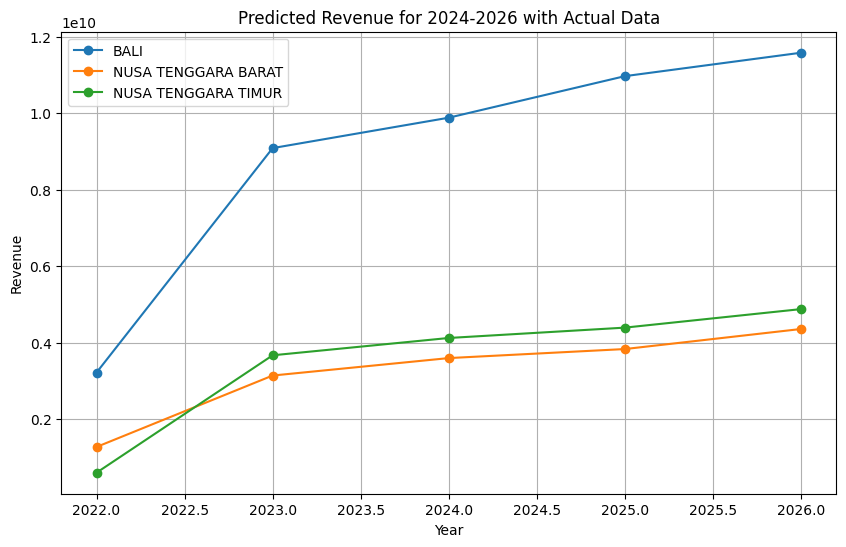

In [21]:
# Plot the predicted revenue
plt.figure(figsize=(10, 6))
for province in df.index:
    plt.plot([2022, 2023, 2024, 2025, 2026],
             df.loc[province, ['2022', '2023', 'pred_2024', 'pred_2025', 'pred_2026']].astype(int),
             marker='o', label=province)
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Predicted Revenue for 2024-2026 with Actual Data')
plt.legend()
plt.grid(True)
plt.show()